In [1]:
%load_ext autoreload
%autoreload 2
from imports.data import *
from imports.params import p
from imports.utility import *
import matplotlib.pyplot as plt

# test saved data

In [20]:
p["channel"] = "2chan"
p["cosmology"] = "HYDRO_JETS_published"
data = Data(p)
filename = p_to_filename(p)
data.load_dataset(filename=filename)
print(data.images.shape)

(7947, 2, 64, 64)


In [24]:
ids_to_remove = np.unique(np.where(data.images == 0)[0])
print(ids_to_remove)

[]


In [22]:
###remove image from data and save
print(data.images.shape)
print(data.indices.shape)
data.images = np.delete(data.images, ids_to_remove, axis=0)
data.indices = np.delete(data.indices, ids_to_remove)
print(data.images.shape)
print(data.indices.shape)

(7947, 2, 64, 64)
(7947,)
(7914, 2, 64, 64)
(7914,)


In [23]:
# np.save(p["data_path"] + p_to_filename(p), data.images)
# np.save(p["data_path"] + p_to_filename(p) + "_halo_indices", data.indices)

(8043,)
[7.7240692e+13 1.5173260e+14 7.5179108e+13 ... 7.3254962e+13 8.9885076e+13
 1.5805480e+14]


(array([1006.,  994., 1000., 1000., 1000., 1000., 1000.,  690.,  261.,
          92.]),
 array([13.00068855, 13.20054817, 13.40040779, 13.60026741, 13.80012703,
        13.99998665, 14.19984722, 14.39970684, 14.59956646, 14.79942608,
        14.9992857 ]),
 <BarContainer object of 10 artists>)

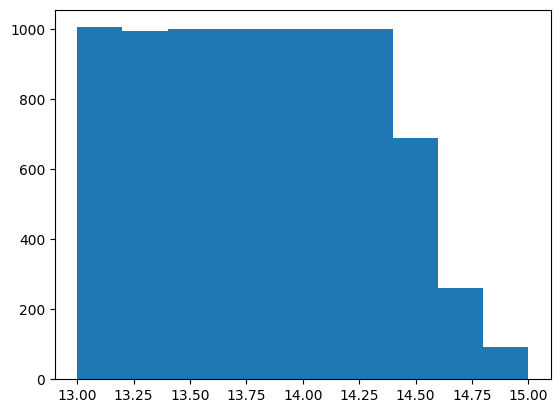

In [6]:
halo_indices = np.load(p["data_path"] + p_to_filename(p) + "_halo_indices" + ".npy")
print(halo_indices.shape)
print(data.soap_file[f"{p['selection_type']}/TotalMass"][()][halo_indices])
plt.hist(np.log10(data.soap_file[f"{p['selection_type']}/TotalMass"][()][halo_indices]))
# np.save(p["data_path"] + p_to_filename(p) + "_masses", data.soap_file[f"{p['selection_type']}/TotalMass"][()][halo_indices])

In [49]:
###Append rest of data to half-finished data generation
dataset = np.load(p["data_path"] + p_to_filename(p) + "big2" + ".npy")
halo_indices = np.load(p["data_path"] + p_to_filename(p) + "big2" + "_halo_indices" + ".npy")
time_start = time.time()
for sample, halo_index in enumerate(halo_indices):
    if sample < len(data.images):
        continue
    red_flux, blue_flux = data.make_obs(halo_index)
    fluxes = np.append(red_flux, blue_flux).reshape(1, 2, p['resolution'], p['resolution'])
    dataset = np.append(dataset, fluxes).reshape(sample+1, 2, p['resolution'], p['resolution'])
    print(f"Sample {sample} of {len(halo_indices)} done. Time running: {time.time() - time_start}s")

    if sample%100 == 99:
        np.save(p["data_path"] + p_to_filename(p) + "big2_append4", dataset)
np.save(p["data_path"] + p_to_filename(p) + "big2_append4", dataset)

In [ ]:
for image in data.images[:10]:
    plt.imshow((image[0]))
    plt.colorbar()
    plt.show()

(7941, 2, 64, 64)


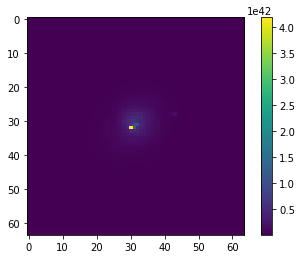

In [69]:
print(data.images.shape)
import matplotlib.pyplot as plt
plt.imshow(data.images[-4, 0])
plt.colorbar()
plt.show()

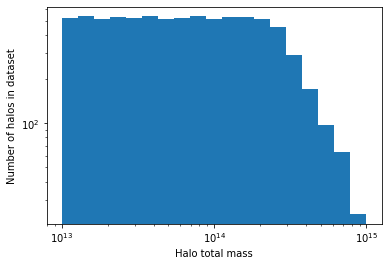

In [20]:
logbins = np.logspace(np.log10(np.min(data.masses)), np.log10(np.max(data.masses)), 20)
plt.hist(data.masses, bins=logbins)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of halos in dataset")
plt.xlabel("Halo total mass")
plt.show()

# make single obs data

In [75]:
data = Data(p)
halo_nr = 1002

print(np.log10(data.soap_file[f"{p['selection_type']}/TotalMass"][halo_nr]))
low, high, sz = data.make_obs(halo_nr, rotate=True, sz=True)

12.839786


/home/tol/.local/lib/python3.11/site-packages/swiftsimio/objects.py:261: RuntimeWarning: Mixing ufunc arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**0.0 at a=1.0) for all arguments.
  warnings.warn(


/home/tol/.local/lib/python3.11/site-packages/swiftsimio/objects.py:261: RuntimeWarning: Mixing ufunc arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**(-2.0) at a=1.0) for all arguments.
  warnings.warn(


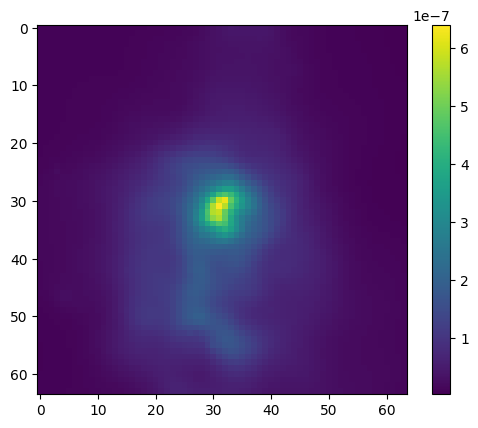

In [78]:
plt.imshow((sz))
plt.colorbar()
plt.show()

In [13]:
soapfile = h5py.File("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0077.hdf5", "r")
mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5")

(cosmo_array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], 'erg/s'), cosmo_array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], 'erg/s'))


In [14]:
print(soapfile["VR/StructureType"][12902130])

10


In [57]:
halo_data = data.make_obs(5772976)

(421128,)
[0.57666016 0.57666016 0.57666016 ... 0.8222656  0.8222656  0.8222656 ] dimensionless (Comoving)


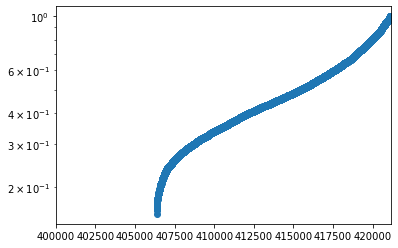

In [85]:
print((halo_data.gas.masses).shape)
print(np.sort(halo_data.gas.last_agnfeedback_scale_factors)[-4000:-1000])
plt.scatter(range(len(halo_data.gas.masses)), np.sort(halo_data.gas.last_agnfeedback_scale_factors))
# plt.xscale("log")
plt.xlim(400000, 421128)
plt.yscale("log")

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'black_holes', 'create_particle_datasets', 'dark_matter', 'filename', 'gas', 'get_metadata', 'get_units', 'mask', 'metadata', 'neutrinos', 'stars', 'units']


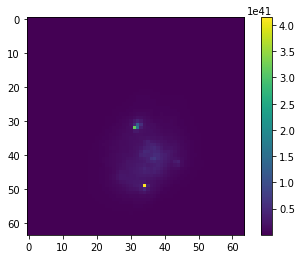

In [56]:
for i in range(5772976, 5772976+1):
    red_flux, blue_flux = data.make_obs(i)
    plt.imshow(red_flux)
    plt.colorbar()
    plt.show()

In [24]:
# def make_obs(halo_index=0):
#     print(soapfile["SO/500_crit/XRayLuminosity"][halo_index])
#     position = soapfile["SO/500_crit/CentreOfMass"][halo_index] * unyt.Mpc
#     # radius = soapfile["SO/500_crit/SORadius"][halo_index] * unyt.Mpc
#     radius = 2*unyt.Mpc
#     load_box = [[position[0] - radius, position[0] + radius], 
#                 [position[1] - radius, position[1] + radius], 
#                 [position[2] - radius, position[2] + radius]]
#     mask.constrain_spatial(load_box)
#     halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)

#     halo_mask = halo_data.gas.last_agnfeedback_scale_factors < 0.999
    

#     halo_data.gas.flux = halo_data.gas.xray_luminosities.erosita_low
#     flux = sw.visualisation.projection.project_gas(
#         halo_data,
#         resolution=64, 
#         project="flux", 
#         region=[position[0] - radius, position[0] + radius, position[1] - radius, position[1] + radius],
#         parallel = True,
#         mask = halo_mask
#     )
#     flux = np.float64(flux)
#     flux.convert_to_units(unyt.erg/unyt.s / unyt.kpc**2)

#     return flux

[8.67039471e+41 5.27437669e+40 6.16591649e+41]
7.736604162846131e+43 erg/(kpc**2*s) (Comoving)


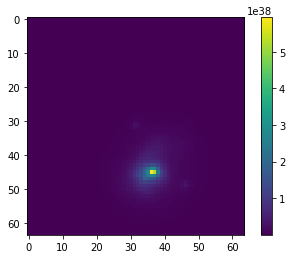

# test compton-y

In [3]:
p["cosmology"] = "HYDRO_PLANCK"
data = Data(p)

In [4]:
mask = sw.mask(data.sw_path)
position = data.soap_file[f"{p['selection_type']}/CentreOfMass"][0] * unyt.Mpc
radius = p['obs_radius'] * unyt.Mpc
load_box = [[position[0] - radius, position[0] + radius], 
            [position[1] - radius, position[1] + radius], 
            [position[2] - radius, position[2] + radius]]
mask.constrain_spatial(load_box)

halo_data = sw.load(data.sw_path, mask=mask)

In [11]:
for i in dir(halo_data.gas.compton_yparameters):
    print(i)
print(halo_data.gas.xray_photon_luminosities.erosita_low)
print(halo_data.gas.xray_luminosities.erosita_low)
print(halo_data.gas.compton_yparameters)

T
__abs__
__add__
__and__
__array__
__array_finalize__
__array_function__
__array_interface__
__array_prepare__
__array_priority__
__array_struct__
__array_ufunc__
__array_wrap__
__bool__
__class__
__class_getitem__
__complex__
__contains__
__copy__
__deepcopy__
__delattr__
__delitem__
__dict__
__dir__
__divmod__
__dlpack__
__dlpack_device__
__doc__
__eq__
__float__
__floordiv__
__format__
__ge__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__iadd__
__iand__
__ifloordiv__
__ilshift__
__imatmul__
__imod__
__imul__
__index__
__init__
__init_subclass__
__int__
__invert__
__ior__
__ipow__
__irshift__
__isub__
__iter__
__itruediv__
__ixor__
__le__
__len__
__lshift__
__lt__
__matmul__
__mod__
__module__
__mul__
__ne__
__neg__
__new__
__or__
__pos__
__pow__
__radd__
__rand__
__rdivmod__
__reduce__
__reduce_ex__
__repr__
__rfloordiv__
__rlshift__
__rmatmul__
__rmod__
__rmul__
__ror__
__rpow__
__rrshift__
__rshift__
__rsub__
__rtruediv__
__rxor__
__setattr__
__setitem__
__setstate_

In [47]:
d = halo_data.metadata.cosmology
print(halo_data.metadata.cosmology)
print(d["Universe age [internal units]"]*1000 - 0.015)
print( (d["Omega_m"] / d["Omega_lambda"] * np.sinh(3.0/2.0 * np.sqrt(d["Omega_lambda"]) * d["H0 [internal units]"] * (d["Hubble time [internal units]"] - 0.000015))**2)**(1./3.))
# print(dir(halo_data.metadata.cosmology.values))
# print(dir(astropy))

{'Cosmological run': array([1], dtype=int32), 'Critical density [internal units]': array([12.87106552]), 'H [internal units]': array([68.09999997]), 'H0 [internal units]': array([68.09999997]), 'Hubble time [internal units]': array([0.01468429]), 'Lookback time [internal units]': array([9.02056208e-16]), 'M_nu_eV': array([0.06]), 'N_eff': array([3.04400163]), 'N_nu': array([1.]), 'N_ur': array([2.0308]), 'Omega_b': array([0.0486]), 'Omega_cdm': array([0.256011]), 'Omega_g': array([5.33243487e-05]), 'Omega_k': array([2.5212783e-09]), 'Omega_lambda': array([0.693922]), 'Omega_m': array([0.304611]), 'Omega_nu': array([0.00138908]), 'Omega_nu_0': array([0.00138908]), 'Omega_r': array([7.79180471e-05]), 'Omega_ur': array([2.45936984e-05]), 'Redshift': array([0.]), 'Scale-factor': array([1.]), 'T_CMB_0 [K]': array([2.7255]), 'T_CMB_0 [internal units]': array([2.7255]), 'T_nu_0 [eV]': array([0.00016819]), 'T_nu_0 [internal units]': array([1.9517578]), 'Universe age [internal units]': array([0